In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
PATH = "../Data/Miles_Traveled.csv"

df = pd.read_csv(PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


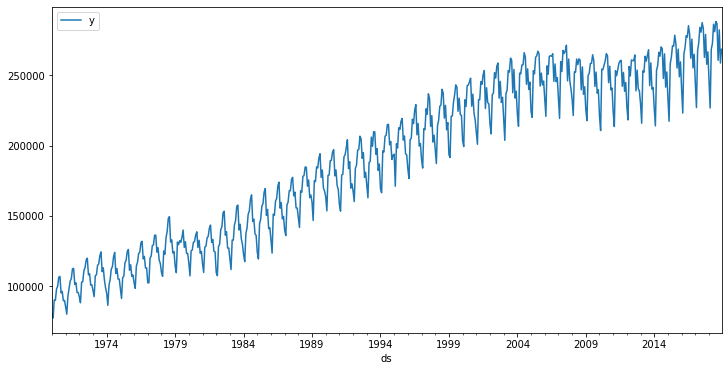

In [6]:
df.plot(x='ds', y='y', figsize=(12, 6))

In [7]:
len(df)

588

In [8]:
train = df.iloc[:576]
test = df.iloc[576:]

In [9]:
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


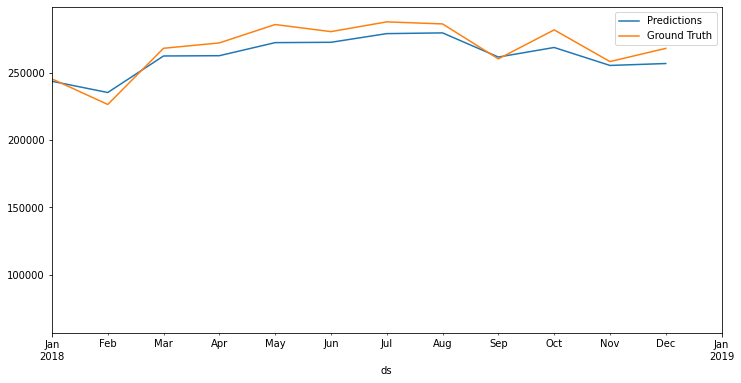

In [10]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,6))
test.plot(x='ds', y='y', label='Ground Truth', legend=True, ax=ax, 
          xlim=('2018-01-01', '2019-01-01'))

In [11]:
from statsmodels.tools.eval_measures import rmse

/home/pritthijit/Online-Courses/Machine-Learning/Course/Python/venv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
predictions = forecast.iloc[-12:]['yhat']
rmse(predictions, test['y'])

8566.92957471868

In [13]:
test.mean()

y    268739.666667
dtype: float64

In [14]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [15]:
initial = 5 * 365
initial = str(initial) + ' days'
initial

'1825 days'

In [16]:
period = 5 * 365
period = str(period) + ' days'
period

'1825 days'

In [17]:
horizon = 365
horizon = str(horizon) + ' days'
horizon

'365 days'

In [18]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [19]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087427,106977.528412,109841.069314,102445.0,1976-12-11
1,1977-02-01,102996.111549,101622.740942,104532.339733,102416.0,1976-12-11
2,1977-03-01,118973.318172,117592.292302,120358.401672,119960.0,1976-12-11
3,1977-04-01,120612.923765,119133.553741,122137.078824,121513.0,1976-12-11
4,1977-05-01,127883.031885,126348.159389,129408.837330,128884.0,1976-12-11


In [20]:
len(df_cv)

108

In [21]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.415770e+07,4915.048237,4518.559986,0.027634,0.023516,0.4
1,53 days,2.155471e+07,4642.705120,4237.336402,0.024741,0.023516,0.4
2,54 days,1.827874e+07,4275.364603,3723.803879,0.019953,0.022483,0.5
3,55 days,2.322885e+07,4819.631510,4251.193280,0.023059,0.023516,0.4
4,57 days,2.099111e+07,4581.605985,3981.886654,0.021304,0.022483,0.5
...,...,...,...,...,...,...,...
94,360 days,1.858583e+07,4311.128914,3793.555037,0.019848,0.019536,0.5
95,361 days,1.770721e+07,4207.993180,3515.428948,0.018461,0.018998,0.5
96,362 days,3.202116e+07,5658.723874,4438.650488,0.022249,0.024780,0.4
97,364 days,3.030964e+07,5505.419343,4279.898637,0.021658,0.021828,0.5


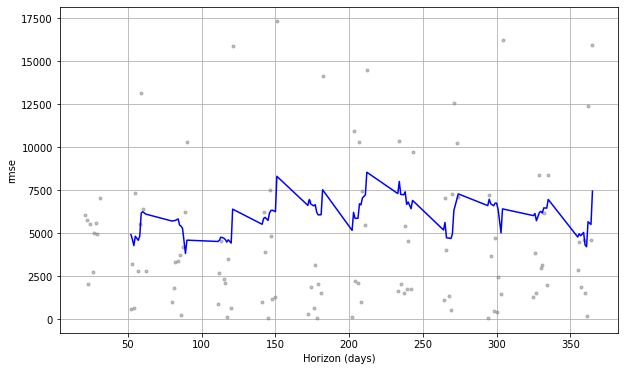

In [22]:
plot_cross_validation_metric(df_cv, metric='rmse');